In [172]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import sklearn.preprocessing as pp
import sklearn.ensemble as ens
import seaborn as sns

In [173]:
df = pd.read_csv('data.csv')
df 

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
9996,a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
9997,b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1
9998,88709f1defd232243f729912be696f87,Kartu B,25000.00,33333.33,0.0,0.0,23497.33,0.0,0.0,0.0,0.0,0.0,15,786,1


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  object 
 1   product      10000 non-null  object 
 2   reload_1     10000 non-null  float64
 3   reload_2     10000 non-null  float64
 4   video        10000 non-null  float64
 5   music        10000 non-null  float64
 6   games        10000 non-null  float64
 7   chat_1       10000 non-null  float64
 8   chat_2       10000 non-null  float64
 9   socmed_1     10000 non-null  float64
 10  socmed_2     10000 non-null  float64
 11  internet     10000 non-null  float64
 12  days_active  10000 non-null  int64  
 13  tenure       10000 non-null  int64  
 14  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 1.1+ MB


In [175]:
numbers = df["churn"].value_counts()
numbers

churn
0    8000
1    2000
Name: count, dtype: int64

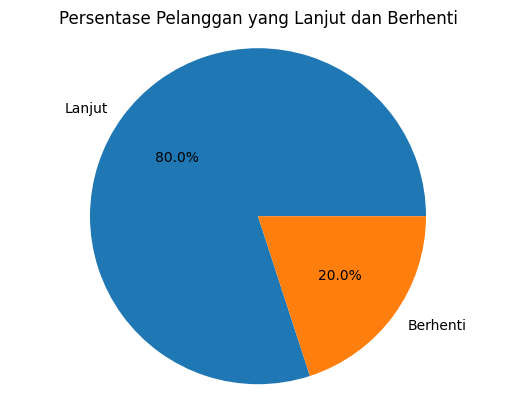

In [176]:


plt.pie([8000,2000],labels=["Lanjut","Berhenti"],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Persentase Pelanggan yang Lanjut dan Berhenti')
plt.show()

In [177]:
df["product"].value_counts()

product
Kartu C    7548
Kartu B    1679
Kartu A     773
Name: count, dtype: int64

In [178]:
pd.get_dummies(df["product"],dtype='int')

,Kartu A,Kartu B,Kartu C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,0,1,0
9997,0,1,0
9998,0,1,0


In [179]:
df2 = pd.concat([df,pd.get_dummies(df["product"], dtype="int")],axis=1)
df2.drop("product",axis=1,inplace=True)

In [180]:
df2.drop("customer_id",axis=1,inplace=True)

In [181]:
df2

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu A,Kartu B,Kartu C
0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0,1,0,0
1,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0,1,0,0
2,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0,1,0,0
3,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0,1,0,0
4,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1,0,1,0
9996,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1,0,1,0
9997,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1,0,1,0
9998,25000.00,33333.33,0.0,0.0,23497.33,0.0,0.0,0.0,0.0,0.0,15,786,1,0,1,0


In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reload_1     10000 non-null  float64
 1   reload_2     10000 non-null  float64
 2   video        10000 non-null  float64
 3   music        10000 non-null  float64
 4   games        10000 non-null  float64
 5   chat_1       10000 non-null  float64
 6   chat_2       10000 non-null  float64
 7   socmed_1     10000 non-null  float64
 8   socmed_2     10000 non-null  float64
 9   internet     10000 non-null  float64
 10  days_active  10000 non-null  int64  
 11  tenure       10000 non-null  int64  
 12  churn        10000 non-null  int64  
 13  Kartu A      10000 non-null  int64  
 14  Kartu B      10000 non-null  int64  
 15  Kartu C      10000 non-null  int64  
dtypes: float64(10), int64(6)
memory usage: 1.2 MB


In [183]:
df2

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu A,Kartu B,Kartu C
0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0,1,0,0
1,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0,1,0,0
2,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0,1,0,0
3,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0,1,0,0
4,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1,0,1,0
9996,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1,0,1,0
9997,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1,0,1,0
9998,25000.00,33333.33,0.0,0.0,23497.33,0.0,0.0,0.0,0.0,0.0,15,786,1,0,1,0


In [184]:
cor = df2.corr()
cor

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu A,Kartu B,Kartu C
reload_1,1.000000,0.921328,0.124707,0.119497,0.138294,0.437082,0.509029,0.038242,0.043553,0.723312,0.125625,0.111676,-0.060128,-0.011221,0.003940,0.003543
reload_2,0.921328,1.000000,0.177122,0.164522,0.197651,0.548072,0.613124,0.056299,0.064593,0.741254,0.163847,0.158608,-0.069266,-0.010945,-0.001628,0.008209
video,0.124707,0.177122,1.000000,0.728816,0.889757,0.104861,0.077843,0.012046,0.009932,0.204017,0.154818,0.077655,-0.065324,-0.006731,-0.031338,0.031407
music,0.119497,0.164522,0.728816,1.000000,0.891254,0.095405,0.080401,0.010349,0.011209,0.181892,0.145409,0.067706,-0.044716,-0.006573,-0.014977,0.017092
games,0.138294,0.197651,0.889757,0.891254,1.000000,0.109749,0.088795,0.012143,0.012362,0.212477,0.147984,0.068572,-0.021367,0.006519,-0.007909,0.002825
chat_1,0.437082,0.548072,0.104861,0.095405,0.109749,1.000000,0.814156,0.056554,0.064903,0.568202,0.194446,0.174225,-0.103881,-0.017864,-0.032182,0.039051
chat_2,0.509029,0.613124,0.077843,0.080401,0.088795,0.814156,1.000000,0.058112,0.074690,0.532345,0.182524,0.178391,-0.096341,-0.018223,-0.037027,0.043483
socmed_1,0.038242,0.056299,0.012046,0.010349,0.012143,0.056554,0.058112,1.000000,0.886667,0.049377,0.063699,0.062629,-0.037082,-0.006091,-0.020894,0.021935
socmed_2,0.043553,0.064593,0.009932,0.011209,0.012362,0.064903,0.074690,0.886667,1.000000,0.057697,0.054827,0.068785,-0.019986,0.000776,-0.005920,0.004662
internet,0.723312,0.741254,0.204017,0.181892,0.212477,0.568202,0.532345,0.049377,0.057697,1.000000,0.190023,0.160670,-0.094807,-0.020207,-0.020116,0.030022


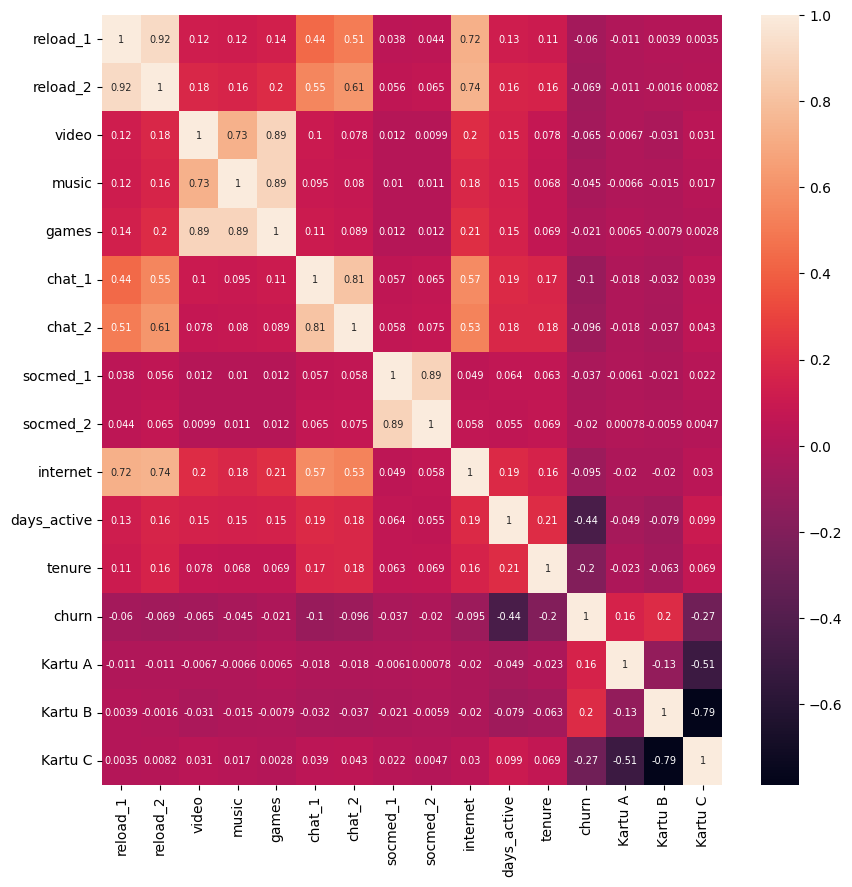

In [185]:
sns.heatmap(cor,annot=True,annot_kws={"size": 7})
heatmap = plt.gcf()
heatmap.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [186]:
X = df2.drop(["churn","reload_2","games","socmed_2"],axis=1)
y = df2["churn"]

In [187]:
X

,reload_1,video,music,chat_1,chat_2,socmed_1,internet,days_active,tenure,Kartu A,Kartu B,Kartu C
0,27734.30,22000.0,33009.9,1716.0,2145.0,0.0,11000.0,15,776,1,0,0
1,26433.00,0.0,0.0,0.0,15444.0,0.0,74151.0,13,352,1,0,0
2,93212.17,0.0,0.0,86795.5,94649.5,330.0,27467.0,15,1987,1,0,0
3,183.33,0.0,0.0,0.0,0.0,0.0,0.0,2,285,1,0,0
4,95296.67,0.0,0.0,118800.0,104940.0,0.0,63855.0,15,1081,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1634.33,0.0,0.0,0.0,0.0,0.0,0.0,1,490,0,1,0
9996,30000.33,0.0,0.0,0.0,20001.0,0.0,0.0,1,3120,0,1,0
9997,3333.33,0.0,0.0,0.0,0.0,0.0,0.0,1,483,0,1,0
9998,25000.00,0.0,0.0,0.0,0.0,0.0,0.0,15,786,0,1,0


In [188]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.2,random_state=42)

In [189]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [190]:
model = lm.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [192]:
y_pred = model.predict(X_test)
print(f"this is the pred {y_pred}")

score = mt.accuracy_score(y_test,y_pred)
print(f"this is the score {score}")

precission = mt.precision_score(y_test,y_pred)
print(f"this is the precission {precission}")

auc = mt.roc_auc_score(y_test,y_pred)
print(f"this is the auc {auc}")

this is the pred [0 0 0 ... 0 0 0]
this is the score 0.83
this is the precission 0.6124401913875598
this is the auc 0.6402661835121934


In [194]:
model = ens.RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [195]:
y_pred = model.predict(X_test)
print(f"this is the pred {y_pred}")

score = mt.accuracy_score(y_test,y_pred)
print(f"this is the score {score}")

precission = mt.precision_score(y_test,y_pred)
print(f"this is the precission {precission}")

auc = mt.roc_auc_score(y_test,y_pred)
print(f"this is the auc {auc}")

this is the pred [0 0 1 ... 0 0 0]
this is the score 0.921
this is the precission 0.8338192419825073
this is the auc 0.8518401040640404


<Axes: >

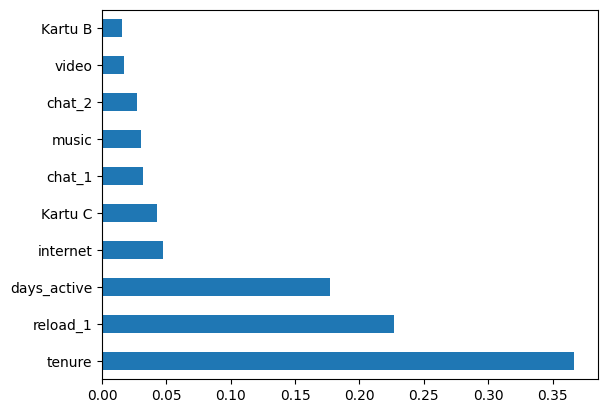

In [197]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')